#### Importing the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('yelp-reviews-dataset/yelp.csv')

In [3]:
data.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [4]:
data.shape

(10000, 10)

In [5]:
#Sorting the date in ascending order
data.sort_values(['date'], ascending=True,inplace=True)

In [6]:
data.reset_index(inplace =True)

In [7]:
#Applying the function to reduce the star column in binary values
data['sentiments'] = data['stars'].apply(lambda x:1 if x==3 or x==4 or x==5 else 0)

In [8]:
X = data[['date','review_id','text','type','cool','useful','funny']]

In [9]:
y = data[['sentiments']]

#### Text Cleaning 

In [10]:
def decontracted(phrase):
# specific
    phrase = re.sub(r"won’t", "will not", phrase)
    phrase = re.sub(r"can’t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
X['text'].apply(decontracted)

0       Wood fired pizzas, scrumptious pasta dishes an...
1       Happy hour in Phoenix from 5PM to midnight on ...
2       You are in 120 degree Scottsdale weather and y...
3       decent.  the potstickers were kind of good.  I...
4       I went here because all my friends were peeing...
                              ...                        
9995    Great food. Service consistently blows. Sit at...
9996    I was a little bit scared to eat at this place...
9997    My husband surprised me with a stay-cation at ...
9998    It appears that the service kinks have been wo...
9999    My daughter and I really love it here.  I alwa...
Name: text, Length: 10000, dtype: object

In [12]:
def stripunc(data):
    return re.sub('[^A-Za-z]+', ' ', str(data), flags=re.MULTILINE|re.DOTALL)

In [13]:
X['text'].apply(stripunc) 

0       Wood fired pizzas scrumptious pasta dishes and...
1       Happy hour in Phoenix from PM to midnight on T...
2       You re in degree Scottsdale weather and you ne...
3       decent the potstickers were kind of good I did...
4       I went here because all my friends were peeing...
                              ...                        
9995    Great food Service consistently blows Sit at t...
9996    I was a little bit scared to eat at this place...
9997    My husband surprised me with a stay cation at ...
9998    It appears that the service kinks have been wo...
9999    My daughter and I really love it here I always...
Name: text, Length: 10000, dtype: object

In [14]:
X=X[['text','type','cool','useful','funny']]

#### Splitting 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0, shuffle =False)

#### Vectorizer

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(input='content',ngram_range=(1,1))
train = vectorizer.fit_transform(X_train['text'])

In [17]:
train[0].data

array([1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
train[0].nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 array([26466,  9259, 17883, 20888, 17269,  7239,  1300,  2119, 26544,
        21433, 11817,  3927, 26748, 10451, 26574, 26404, 17897, 23993,
        26548, 24073, 12168, 15485,  8528, 25545,   806,  1597, 10511,
        11179, 21893,  1846, 21755,  2266,  6171,  3723, 24003,  9563,
        12702, 16835], dtype=int32))

In [19]:
test = vectorizer.transform(X_test['text'])

In [20]:
train.shape

(8000, 26910)

In [21]:
test.shape

(2000, 26910)

In [22]:
import seaborn as sb

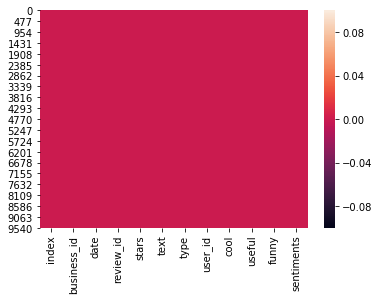

In [23]:
sb.heatmap(data.isnull())

#### Logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(n_jobs =-1)

In [25]:
classifier.fit(train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred = classifier.predict(test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9005

##### Hyperparamter tunning

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [29]:
params = {'penalty':['l1','l2'],'C':[10**x for x in range(-4,5,1)]}
model = GridSearchCV(LogisticRegression(n_jobs=-1), param_grid=params,cv=5, n_jobs=-1, scoring='accuracy',return_train_score=True)
model.fit(train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [30]:
model.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [31]:
model.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
train_pred = model.best_estimator_.predict(train)
test_pred = model.best_estimator_.predict(test)

In [33]:
from sklearn import metrics
print(metrics.accuracy_score(y_train, train_pred))
print(metrics.accuracy_score(y_test, test_pred))

0.96375
0.893


In [34]:
 cv_r = model.cv_results_

In [35]:
model.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
model.best_score_

0.894375

In [37]:
CV = pd.DataFrame(cv_r)

In [38]:
CV.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.150237,0.028322,0.004354,0.001733,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",0.810743,0.798125,0.793125,...,0.782125,0.023462,18,0.774965,0.778125,0.779375,0.788594,0.789564,0.782125,0.005865
1,0.312988,0.074425,0.005028,0.001929,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.837601,0.838125,0.838125,...,0.838125,0.000331,16,0.838256,0.838125,0.838125,0.838125,0.837994,0.838125,0.000083
2,0.314826,0.029053,0.004753,0.003295,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.827608,0.823125,0.819375,...,0.815875,0.010132,17,0.812940,0.814063,0.815000,0.817344,0.820028,0.815875,0.002533


#####  Visualization

In [39]:
mean = CV['mean_test_score']

In [40]:
mt= CV['mean_train_score']

In [41]:
c = CV['param_C']

In [42]:
c2 = c[1::2]

In [43]:
test_l2 = mean[1::2]

In [44]:
test_l1 = mean[0::2]

In [45]:
c1 = c[0::2]

In [46]:
train_l2 = mt[1::2]

In [47]:
train_l1 = mt[0::2]

In [48]:
c = list(map(lambda x: np.log10(x),c2))

In [49]:
c1 = list(map(lambda x: np.log10(x),c1))

Text(0.5, 1.0, 'L2 Regularizer')

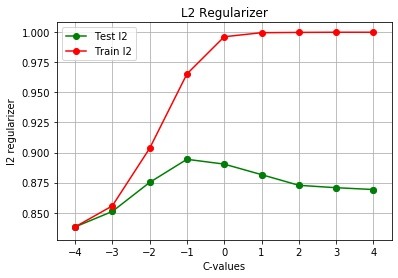

In [50]:
# plt.semilogx(c2,l2,'o-',color="g")
plt.plot(c,test_l2,'o-',color="g",label="Test l2")
plt.plot(c,train_l2,'o-',color="r", label="Train l2")
plt.scatter(c,test_l2)
plt.grid()
plt.legend()
plt.xlabel("C-values")
plt.ylabel("l2 regularizer")
plt.title("L2 Regularizer")

Text(0.5, 1.0, 'L2 Regularizer')

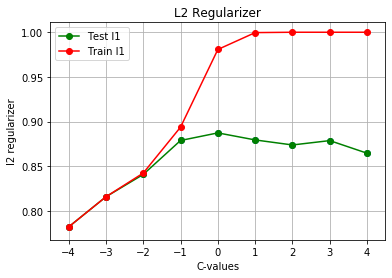

In [51]:
# plt.semilogx(c2,l2,'o-',color="g")
plt.plot(c1,test_l1,'o-',color="g",label="Test l1")
plt.plot(c1,train_l1,'o-',color="r", label="Train l1")
plt.scatter(c1,test_l1)
plt.grid()
plt.legend()
plt.xlabel("C-values")
plt.ylabel("l2 regularizer")
plt.title("L2 Regularizer")

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[ 242,   61],
       [ 138, 1559]])

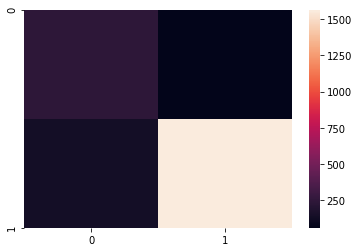

In [79]:
import seaborn as sns
sns.heatmap(cm)

#### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(train, y_train)

In [ ]:
y_pred = neigh.predict(test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

##### Hyperparameter tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_neighbors':[1,3,5,7,9,11,13,15,17,19]}
model = GridSearchCV(KNeighborsClassifier(), param_grid=params, scoring='accuracy', n_jobs=-1, verbose=5, cv=5,return_train_score=True)
model.fit(train, y_train)

In [ ]:
train_pred = model.predict(train)
test_pred = model.predict(test)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_train, train_pred))
print(metrics.accuracy_score(y_test, test_pred))

In [ ]:
kn = model.cv_results_

In [ ]:
model.best_score_

In [ ]:
model.best_params_

In [ ]:
k_results = pd.DataFrame(kn)

In [ ]:
k_results.head(2)

##### Visulaization

In [ ]:
test_score = k_results['mean_test_score']

In [ ]:
param = k_results['param_n_neighbors']

In [ ]:
train_score = k_results['mean_train_score']

In [ ]:
# plt.semilogx(c2,l2,'o-',color="g")
plt.plot(param,test_score,'o-',color="g",label="Test_score")
plt.plot(param,train_score,'o-',color="r", label="Train_score")
plt.grid()
plt.legend()
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN_Hyperparameter tunning")

#### Naive Bays